In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
# read data
df = pd.read_excel('data/bmi_data_phw3.xlsx')

In [3]:
# dataset statistical data
print(df.describe(), "\n")

              Age  Height (Inches)  Weight (Pounds)         BMI
count  100.000000       100.000000       100.000000  100.000000
mean    27.710000        67.753037       124.101520    2.420000
std      5.347132         2.061955        16.745017    1.036505
min     18.000000        63.125500        83.085300    0.000000
25%     23.750000        66.535825       116.573575    2.000000
50%     28.000000        67.805600       124.675200    3.000000
75%     32.250000        69.064800       134.534375    3.000000
max     35.000000        73.268700       164.586500    4.000000 



In [4]:
# feature names
print(df.columns.values, '\n')

['Sex' 'Age' 'Height (Inches)' 'Weight (Pounds)' 'BMI'] 



In [5]:
# data types
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              100 non-null    object 
 1   Age              100 non-null    int64  
 2   Height (Inches)  100 non-null    float64
 3   Weight (Pounds)  100 non-null    float64
 4   BMI              100 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB
None 



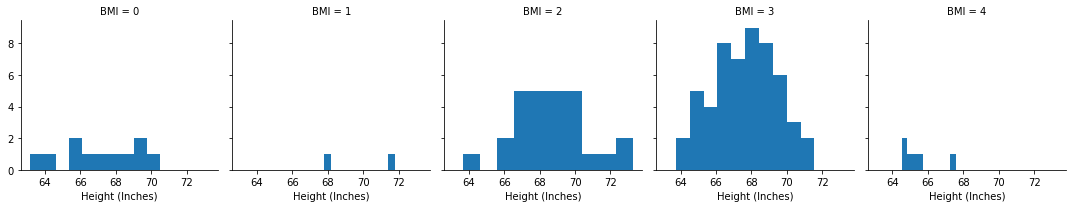

In [6]:
# create histogram for height for each BMI
g1 = sns.FacetGrid(df, col="BMI")
g1.map(plt.hist, 'Height (Inches)', bins=10)

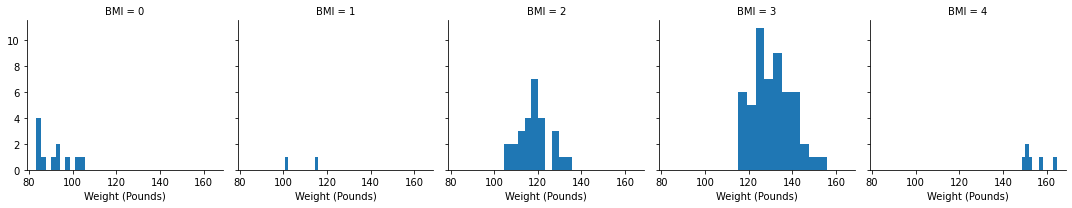

In [7]:
# create histogram for weight for each BMI
g2 = sns.FacetGrid(df, col='BMI')
g2.map(plt.hist, 'Weight (Pounds)', bins=10)

In [8]:
# read data
df_scaler = pd.read_excel('data/bmi_data_phw3.xlsx')

# convert object data to numerical data
labelEncoder = LabelEncoder()
labelEncoder.fit(df_scaler['Sex'])
df_scaler['Sex'] = labelEncoder.transform(df_scaler['Sex'])

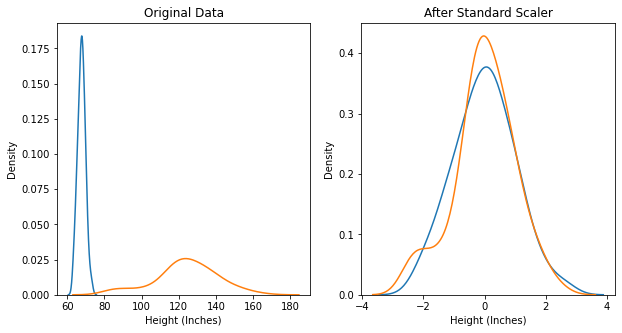

In [9]:
# scaling results for height and weight - StandardScaler
stdScaler = preprocessing.StandardScaler()
stdScaler_df = stdScaler.fit_transform(df_scaler)
stdScaler_df = pd.DataFrame(stdScaler_df, columns=['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(stdScaler_df['Height (Inches)'], ax=ax2)
sns.kdeplot(stdScaler_df['Weight (Pounds)'], ax=ax2)
plt.show()

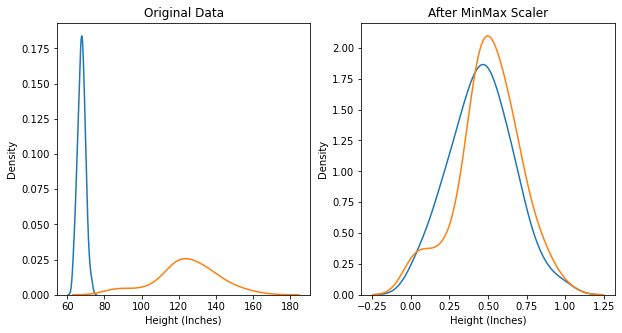

In [10]:
# scaling results for height and weight - MinMaxScaler
minmaxScaler = preprocessing.MinMaxScaler()
minmaxScaler_df = minmaxScaler.fit_transform(df_scaler)
minmaxScaler_df = pd.DataFrame(minmaxScaler_df, columns=['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(minmaxScaler_df['Height (Inches)'], ax=ax2)
sns.kdeplot(minmaxScaler_df['Weight (Pounds)'], ax=ax2)
plt.show()

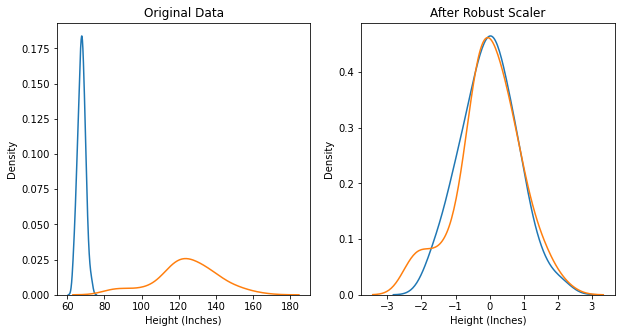

In [11]:
# scaling results for height and weight - RobustScaler
robustScaler = preprocessing.RobustScaler()
robustScaler_df = robustScaler.fit_transform(df_scaler)
robustScaler_df = pd.DataFrame(robustScaler_df, columns=['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(robustScaler_df['Height (Inches)'], ax=ax2)
sns.kdeplot(robustScaler_df['Weight (Pounds)'], ax=ax2)
plt.show()

In [12]:
# All Data
# compute the linear regression equation
x = df['Height (Inches)']
y = df['Weight (Pounds)']
reg = linear_model.LinearRegression()
reg.fit(x[:, np.newaxis], y)
px = np.array([x.min() - 1, x.max() + 1])
py = reg.predict(px[:, np.newaxis])

# for height, weight of each compute, compute error
for x in df.index:
    df.loc[x, 'Error'] = df.loc[x, "Weight (Pounds)"] - reg.predict([[df.loc[x, "Height (Inches)"]]])

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_20920\1073882337.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(x[:, np.newaxis], y)


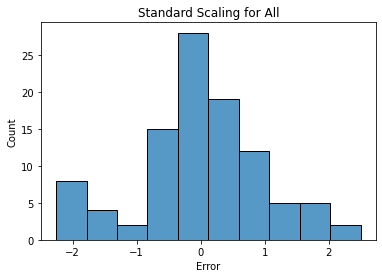

In [13]:
# copy data and drop BMI column
df_noBMI = df
df_noBMI = df_noBMI.drop('BMI', axis=1)

# labeling object data 'Sex'
labelEncoder = LabelEncoder()
labelEncoder.fit(df_noBMI['Sex'])
df_noBMI['Sex'] = labelEncoder.transform(df_noBMI['Sex'])

# scaling result for error - StandardScaler
eStdScaler = preprocessing.StandardScaler()
eStdScaler_df = eStdScaler.fit_transform(df_noBMI)
eStdScaler_df = pd.DataFrame(eStdScaler_df, columns=['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'Error'])

g_all = sns.histplot(data=eStdScaler_df,x="Error",bins=10)
g_all.set_title('Standard Scaling for All')
plt.show()

In [14]:
# Decide a value a of All
alpha_all = 1.5

for x in eStdScaler_df.index:
    if eStdScaler_df.loc[x, 'Error'] >= alpha_all:
        eStdScaler_df.loc[x, 'BMI'] = 4
    if eStdScaler_df.loc[x, 'Error'] <= -alpha_all:
        eStdScaler_df.loc[x, 'BMI'] = 0

ori_condition = (df.BMI == 0) | (df.BMI == 4)
condition = (eStdScaler_df.BMI == 0) | (eStdScaler_df.BMI == 4)
print('Number of BMI 0 and 4 in the Original all data : ' + str(len(df[ori_condition].index)))
print('Number of BMI 0 and 4 in the alpha specified : ' + str(len(eStdScaler_df[condition].index)))
print('The alpha for all data is ' + str(alpha_all))

Number of BMI 0 and 4 in the Original all data : 17
Number of BMI 0 and 4 in the alpha specified : 17
The alpha for all data is 1.5


In [15]:
# Divide data for each gender
df_male = df.query("Sex == 'Male'")
male_x = df_male['Height (Inches)']
male_y = df_male['Weight (Pounds)']

df_female = df.query("Sex == 'Female'")
female_x = df_female['Height (Inches)']
female_y = df_female['Weight (Pounds)']

C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_20920\1033258404.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(male_x[:, np.newaxis], male_y)


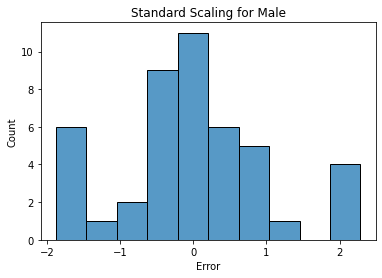

In [16]:
# Male
reg = linear_model.LinearRegression()
reg.fit(male_x[:, np.newaxis], male_y)
px = np.array([male_x.min() - 1, male_x.max() + 1])
py = reg.predict(px[:, np.newaxis])

# for height, weight of each compute, compute error
for x in df_male.index:
    df_male.loc[x, 'Error'] = df_male.loc[x, "Weight (Pounds)"] - reg.predict([[df_male.loc[x, "Height (Inches)"]]])

# drop Sex, BMI column
df_male_noBMI = df_male.drop(['Sex', 'BMI'], axis=1)

# scaling result for error - StandardScaler
male_eStdScaler = preprocessing.StandardScaler()
male_eStdScaler_df = male_eStdScaler.fit_transform(df_male_noBMI)
male_eStdScaler_df = pd.DataFrame(male_eStdScaler_df, columns=['Age', 'Height (Inches)', 'Weight (Pounds)', 'Error'])

g_male = sns.histplot(data=male_eStdScaler_df, x="Error", bins=10)
g_male.set_title('Standard Scaling for Male')
plt.show()

In [17]:
# Decide a value a of Male
alpha_male = 1.25

for x in male_eStdScaler_df.index:
    if male_eStdScaler_df.loc[x, 'Error'] >= alpha_male:
        male_eStdScaler_df.loc[x, 'BMI'] = 4
    if male_eStdScaler_df.loc[x, 'Error'] <= -alpha_male:
        male_eStdScaler_df.loc[x, 'BMI'] = 0

ori_condition = (df_male.BMI == 0) | (df_male.BMI == 4)
condition = (male_eStdScaler_df.BMI == 0) | (male_eStdScaler_df.BMI == 4)
print('Number of BMI 0 and 4 in the Original male data : ' + str(len(df_male[ori_condition].index)))
print('Number of BMI 0 and 4 in the alpha specified male data: ' + str(len(male_eStdScaler_df[condition].index)))
print('The alpha for male data is ' + str(alpha_male))

Number of BMI 0 and 4 in the Original male data : 11
Number of BMI 0 and 4 in the alpha specified male data: 11
The alpha for male data is 1.25


C:\Users\ChungHyunwoo\AppData\Local\Temp\ipykernel_20920\353381224.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(female_x[:, np.newaxis], female_y)


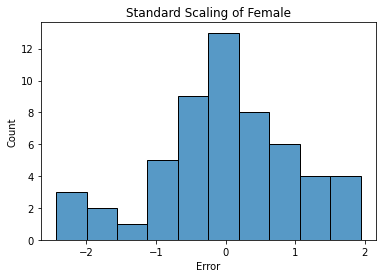

In [18]:
# Female
reg = linear_model.LinearRegression()
reg.fit(female_x[:, np.newaxis], female_y)
px = np.array([female_x.min() - 1, female_x.max() + 1])
py = reg.predict(px[:, np.newaxis])

# for height, weight of each compute, compute error
for x in df_female.index:
    df_female.loc[x, 'Error'] = df_female.loc[x, "Weight (Pounds)"] - reg.predict([[df_female.loc[x, "Height (Inches)"]]])

# drop Sex, BMI column
df_female_noBMI = df_female.drop(['Sex', 'BMI'], axis=1)

# scaling result for error - StandardScaler
female_eStdScaler = preprocessing.StandardScaler()
female_eStdScaler_df = female_eStdScaler.fit_transform(df_female_noBMI)
female_eStdScaler_df = pd.DataFrame(female_eStdScaler_df, columns=['Age', 'Height (Inches)', 'Weight (Pounds)', 'Error'])

g_female = sns.histplot(data=female_eStdScaler_df, x="Error", bins=10)
g_female.set_title('Standard Scaling of Female')
plt.show()

In [19]:
# Decide a value a of Female
alpha_female = 1.75

for x in female_eStdScaler_df.index:
    if female_eStdScaler_df.loc[x, 'Error'] >= alpha_female:
        female_eStdScaler_df.loc[x, 'BMI'] = 4
    if female_eStdScaler_df.loc[x, 'Error'] <= -alpha_female:
        female_eStdScaler_df.loc[x, 'BMI'] = 0

ori_condition = (df_female.BMI == 0) | (df_female.BMI == 4)
condition = (female_eStdScaler_df.BMI == 0) | (female_eStdScaler_df.BMI == 4)
print('Number of BMI 0 and 4 in the Original female data : ' + str(len(df_female[ori_condition].index)))
print('Number of BMI 0 and 4 in the alpha specified female data: ' + str(len(female_eStdScaler_df[condition].index)))
print('The alpha for female data is ' + str(alpha_female))

Number of BMI 0 and 4 in the Original female data : 6
Number of BMI 0 and 4 in the alpha specified female data: 7
The alpha for female data is 1.75
